1
0.5


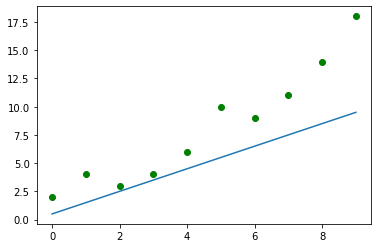

In [2]:
import matplotlib.pyplot as plt

x =[i for i in range(10)]
y =[2,4,3,4,6,10,9,11,14,18]

m=float(input())
c=float(input())
a=m*0+c
b=m*9+c

plt.scatter(x, y, c='green')
plt.plot([0,9],[a,b])

plt.show()

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('./Fish.csv')
df = data.copy()
df.sample(10)

,Species,Weight,Length1,Length2,Length3,Height,Width
13,Bream,340.0,29.5,32.0,37.3,13.9129,5.0728
60,Whitefish,1000.0,37.3,40.0,43.5,12.3540,6.5250
120,Perch,900.0,37.0,40.0,42.5,11.7300,7.2250
7,Bream,390.0,27.6,30.0,35.0,12.6700,4.6900
89,Perch,135.0,20.0,22.0,23.5,5.8750,3.5250
150,Smelt,8.7,10.8,11.3,12.6,1.9782,1.2852
22,Bream,620.0,31.5,34.5,39.7,15.5227,5.2801
98,Perch,188.0,22.6,24.6,26.2,6.7334,4.1658
20,Bream,575.0,31.3,34.0,39.5,15.1285,5.5695
96,Perch,225.0,22.0,24.0,25.5,7.2930,3.7230


**Meanings of the Columns:**
* Species: Species name of fish
* Weight: Weight of fish in gram
* Length1: Vertical length in cm
* Length2: Diagonal length in cm
* Length3: Cross length in cm
* Height: Height in cm
* Width: Diagonal width in cm

In [3]:
df.rename(columns= {'Length1':'LengthVer', 'Length2':'LengthDia', 'Length3':'LengthCro'}, inplace=True)
df.head()

,Species,Weight,LengthVer,LengthDia,LengthCro,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
Species      159 non-null object
Weight       159 non-null float64
LengthVer    159 non-null float64
LengthDia    159 non-null float64
LengthCro    159 non-null float64
Height       159 non-null float64
Width        159 non-null float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [6]:
print(str('NaN value in the dataset: '), df.isnull().values.any())

NaN value in the dataset:  False


In [8]:
sp = df['Species'].value_counts()
sp = pd.DataFrame(sp)
sp

,Species
Perch,56
Bream,35
Roach,20
Pike,17
Smelt,14
Parkki,11
Whitefish,6


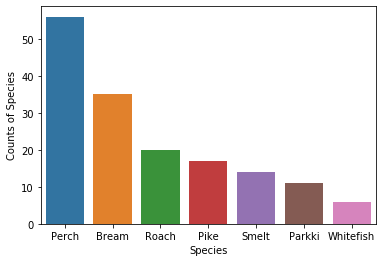

In [9]:
sns.barplot(x=sp.index, y=sp['Species']);
plt.xlabel('Species')
plt.ylabel('Counts of Species')
plt.show()

In [10]:
df.corr()

,Weight,LengthVer,LengthDia,LengthCro,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
LengthVer,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
LengthDia,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
LengthCro,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


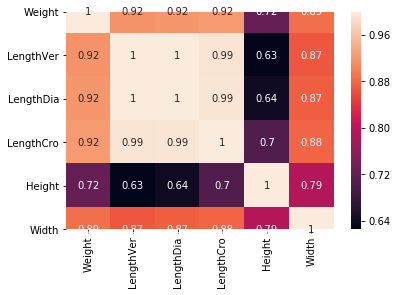

In [14]:
sns.heatmap(df.corr(), annot=True);

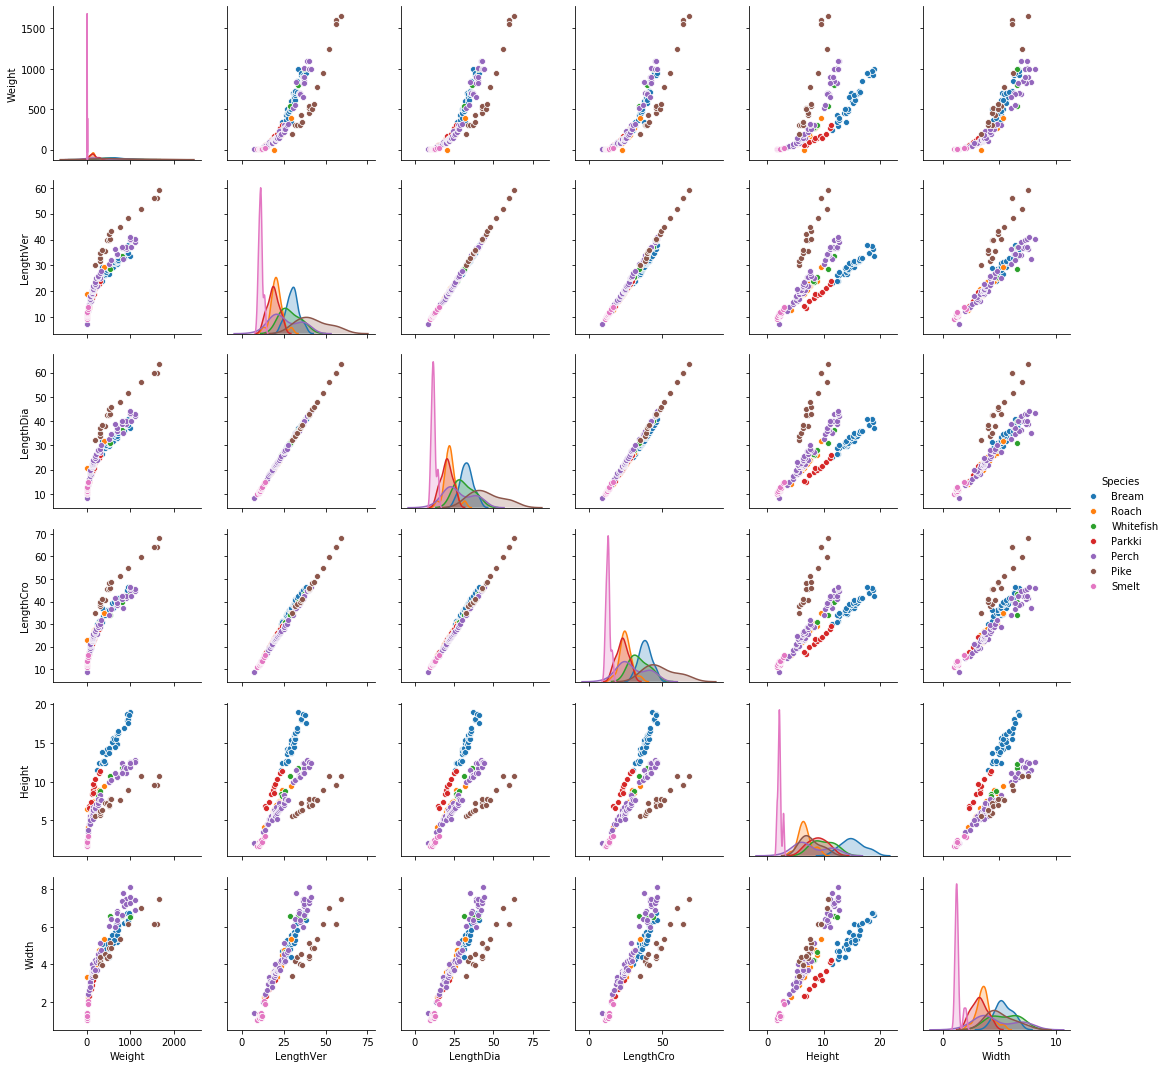

In [15]:
g = sns.pairplot(df, kind='scatter', hue='Species');

In [18]:
y = df['Weight']
X = df.iloc[:,2:7]

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [20]:
print('X_train: ', np.shape(X_train))
print('y_train: ', np.shape(y_train))
print('X_test: ', np.shape(X_test))
print('y_test: ', np.shape(y_test))

X_train:  (127, 5)
y_train:  (127,)
X_test:  (32, 5)
y_test:  (32,)


In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [23]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
print('Model intercept: ', reg.intercept_)
print('Model coefficients: ', reg.coef_)

Model intercept:  -484.85364947368254
Model coefficients:  [ 56.90591757  -4.63465655 -28.54481968  24.25584123  43.68347751]


In [25]:
print('y = ' + str('%.2f' % reg.intercept_) + ' + ' + str('%.2f' % reg.coef_[0]) + '*X1 ' + str('%.2f' % reg.coef_[1]) + '*X2 ' +
      str('%.2f' % reg.coef_[2]) + '*X3 + ' + str('%.2f' % reg.coef_[3]) + '*X4 + ' + str('%.2f' % reg.coef_[4]) + '*X5')

y = -484.85 + 56.91*X1 -4.63*X2 -28.54*X3 + 24.26*X4 + 43.68*X5


In [26]:
y_head = reg.predict(X_train)

In [27]:
r2_score(y_train, y_head)

0.8861940780217027

In [28]:
y_pred = reg.predict(X_test)

In [29]:
print(r2_score(y_test, y_pred))

0.8704220588719107


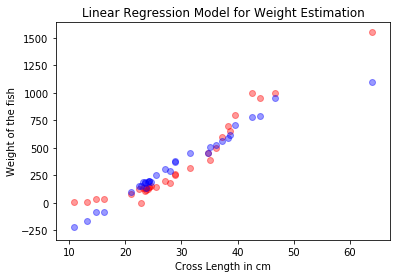

In [30]:
plt.scatter(X_test['LengthCro'], y_test, color='red', alpha=0.4)
plt.scatter(X_test['LengthCro'], y_pred, color='blue', alpha=0.4)
plt.xlabel('Cross Length in cm')
plt.ylabel('Weight of the fish')
plt.title('Linear Regression Model for Weight Estimation');

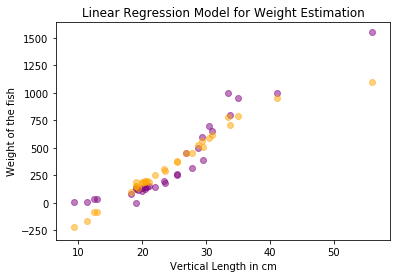

In [31]:
plt.scatter(X_test['LengthVer'], y_test, color='purple', alpha=0.5)
plt.scatter(X_test['LengthVer'], y_pred, color='orange', alpha=0.5)
plt.xlabel('Vertical Length in cm')
plt.ylabel('Weight of the fish')
plt.title('Linear Regression Model for Weight Estimation');

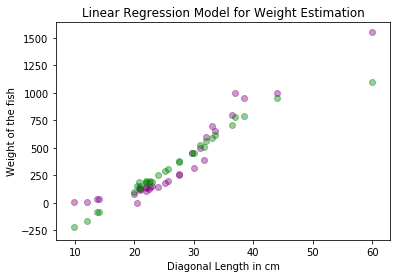

In [32]:
plt.scatter(X_test['LengthDia'], y_test, color='purple', alpha=0.4)
plt.scatter(X_test['LengthDia'], y_pred, color='green', alpha=0.4)
plt.xlabel('Diagonal Length in cm')
plt.ylabel('Weight of the fish')
plt.title('Linear Regression Model for Weight Estimation');